# 📘 TELCO CUSTOMER CHURN: DATA CLEANING & FEATURE ENGINEERING
 **Author**: Kehinde Balogun  
**Objective**: Prepare data for churn prediction modeling  
**Dataset**: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# 1️⃣ Import Required Libraries

In [8]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Display full columns
pd.set_option('display.max_columns', None)

# 2️⃣ Load Dataset

In [14]:
# read csv file
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Quick overview
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3️⃣ BASIC INSPECTION & CLEANING

In [3]:
# Summary information
df.info()

# Check missing values
print("\nMissing values per column:\n", df.isna().sum())

# --- Handle Blank Strings in TotalCharges ---
# TotalCharges should be numeric but may have spaces (" ")
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check missing values again
print("\nMissing after conversion:\n", df.isna().sum())

# Impute missing TotalCharges with median (robust against skew)
median_value = df["TotalCharges"].median()
df["TotalCharges"].fillna(median_value, inplace=True)

# Drop customerID (non-predictive)
df.drop("customerID", axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\Kehinde Balogun\AppData\Local\Temp\ipykernel_102960\1369285196.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(median_value, inplace=True)


# 4️⃣ ENCODING THE TARGET VARIABLE

In [4]:
# Churn: Yes/No → 1/0
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Confirm conversion
df["Churn"].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

# 5️⃣ EXPLORATORY DATA QUALITY CHECKS

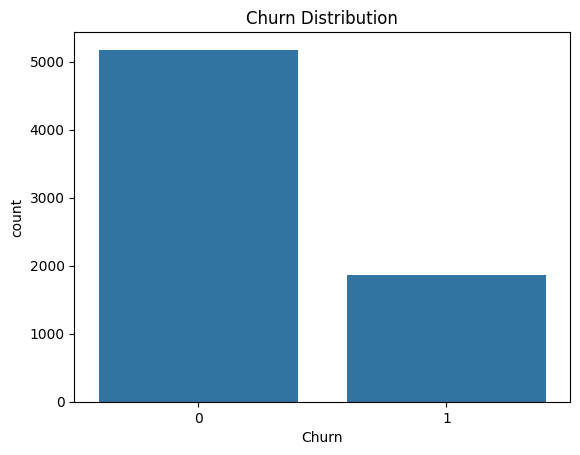

In [5]:
# Basic numerical summary
df.describe()

# Quick churn distribution plot
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

# 6️⃣ HANDLE CATEGORICAL VARIABLES

In [6]:
# Identify categorical vs numerical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = df.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Data shape after encoding:", df_encoded.shape)


Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
Data shape after encoding: (7043, 31)


# 7️⃣ OUTLIER & DATA CONSISTENCY CHECKS

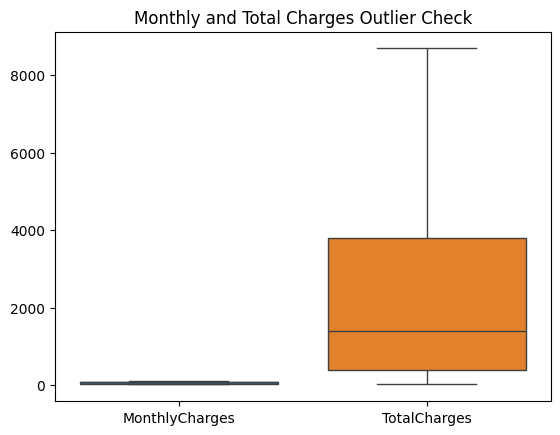

In [9]:
# Visualize MonthlyCharges and TotalCharges
sns.boxplot(data=df_encoded[["MonthlyCharges", "TotalCharges"]])
plt.title("Monthly and Total Charges Outlier Check")
plt.show()

# Optional: Winsorization / clipping if extreme outliers found
df_encoded["MonthlyCharges"] = np.clip(df_encoded["MonthlyCharges"],
                                       df_encoded["MonthlyCharges"].quantile(0.01),
                                       df_encoded["MonthlyCharges"].quantile(0.99))

# 8️⃣ FEATURE SCALING

In [10]:
scaler = StandardScaler()
df_encoded[["MonthlyCharges", "TotalCharges", "tenure"]] = scaler.fit_transform(
    df_encoded[["MonthlyCharges", "TotalCharges", "tenure"]]
)

# 9️⃣ FEATURE ENGINEERING

In [12]:
# 1. Average monthly spend
df_encoded["AvgMonthlySpend"] = (
    (df["TotalCharges"] / (df["tenure"].replace(0, np.nan))).fillna(0)
)

# 2. Service bundling score: count how many services are 'Yes'
service_cols = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]
df_encoded["ServicesCount"] = df[service_cols].apply(lambda x: (x == "Yes").sum(), axis=1)

# 3. Contract strength (month-to-month=1, one year=2, two year=3)
contract_map = {"Month-to-month": 1, "One year": 2, "Two year": 3}
df_encoded["ContractStrength"] = df["Contract"].map(contract_map)

# 4. Auto-payment flag
df_encoded["AutoPay"] = df["PaymentMethod"].apply(
    lambda x: 1 if "automatic" in x.lower() else 0
)

# 5. Interaction features
df_encoded["Tenure_MonthlyCharge"] = df["tenure"] * df["MonthlyCharges"]

# 🔟 FINAL DATASET SUMMARY

In [13]:
print("\nFinal Dataset Shape:", df_encoded.shape)
print("Sample Columns:\n", df_encoded.columns[:15])

# Basic correlation check
corr = df_encoded.corr()["Churn"].sort_values(ascending=False)
print("\nTop 10 Correlated Features with Churn:\n", corr.head(10))

# ===============================================================
# 🔍 SAVE CLEANED DATA FOR MODELING
# ===============================================================
df_encoded.to_csv("Telco_Customer_Churn_Cleaned.csv", index=False)
print("✅ Cleaned dataset saved successfully!")


Final Dataset Shape: (7043, 36)
Sample Columns:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes'],
      dtype='object')

Top 10 Correlated Features with Churn:
 Churn                             1.000000
InternetService_Fiber optic       0.308020
PaymentMethod_Electronic check    0.301919
MonthlyCharges                    0.193646
AvgMonthlySpend                   0.193301
PaperlessBilling_Yes              0.191825
SeniorCitizen                     0.150889
StreamingTV_Yes                   0.063228
StreamingMovies_Yes               0.061382
MultipleLines_Yes                 0.040102
Name: Churn, dtype: float64
✅ Cleaned dataset saved successfully!
